# Experiments Involving Group Comparison
# The Effects Model and Completely Randomized Designs
## Dr Austin R Brown
## School of Data Science and Analytics
### Kennesaw State University


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/abrown9008/STAT-7220-Applied-Experimental-Design/blob/main/Comparative%20Experiments/Introduction%20to%20Completely%20Randomized%20Designs.ipynb)

In [25]:
## Set Working Directory ##

#%cd /content/STAT-7220-Applied-Experimental-Design/Comparative-Experiments

## Introduction 

- In the last section, we learned some of the basics of experimental design.

- In this section, we will begin to learn about specific *designs* we can employ to analyze our data and answer our research questions.

- Let's begin by discussing an example.

### Example Research Scenario

- Suppose we work for a company that manufactures high-end canned beverage coolers (like koozies!). We are considering launching a new cooler and have two designs in mind. One design uses hard plastic and the other uses stainless steel. Since our goal is to maximize the amount of time the beverage stays cold, we want to know which design is better at keeping the beverage cold.

#### Planning the Experiment

- Now that we have a general sense of what our goal is with the experiment, we need to plan the experiment.

- Recall from the last section that the steps in planning a successful experiment are:

    1. Define the objective
    2. Decide what the outcome is (and how it will be measured)
    3. Determine the independent variables and possible lurking variables
    4. Choose the design
    5. Be clear on data collection processes/procedures
    6. Be clear on which analyses will be performed
    7. Draw conclusions

##### Define the Objective

- First, we must define the objective.

- Here, our objective is to determine which of the two cooler materials is better at keeping canned beverages cold.

##### Specify the Outcome

- Next, we must decide what our outcome variable is and how we will measure it.

- You can probably think of several ways to do this, but for the sake of this example, let's define the outcome as the temperature of the beverage (in degrees Fahrenheit) after it has been in the cooler for two hours.

##### Determine the Independent Variable & Possible Lurking Variables

- Now, we need to decide what our independent variable will be an what potential lurking variables may exist.

- Our IV will be the material type.

- While we may have some lurking variables depending on the way we conduct the experiment, we can eliminate many if not all of them by having careful control over:
    - Starting temperature of the canned beverages
    - Consistency of room temperature in room where the cans will be set out for two hours

- To control the starting temperature of the canned beverages, we can keep the cans in the same refrigerator for 24 hours prior to the experiment.

- To control the consistency of the room temperature, we will place the cans on a table in a room kept at a consistent temperature and with the window shades closed.

#### Choose the Design

- In our syllabus, you can see that we have lots of different designs to choose from (e.g., completely randomized design, split-plot, $2^k$, etc.).

- The choice of design is largely a function of our independent variable(s) and how we are conducting the experiment.

- Perhaps the most important element of any experimental design are the concepts of *replication* and *randomization*.

- **Randomization** means that our experimental units are randomly partitioned into treatment groups.

    - Recall from the email marketing example in the last section, our customer base was randomly assigned to be in either the generic email group or the personalized email group. This is an example of randomization.

- Randomization is an important way to eliminate potential sources of variability to ensure that the conclusions we draw are accurate.

- In the email example, imagine we didn't do randomization and we accidentally assigned all female customers to the generic group and all male customers to the personalized group.
    - Whatever differences we observe between the email groups will be *confounded* with customer sex.

- **Replication** refers to having more than one experimental unit in a specific treatment group.

- In our cooler example, we would not perform the temperature test by using only one can in the hard plastic cooler and one in the stainless steel cooler. We would want more *replicates* (typically denoted by $r$).

    - Why? Two reasons!

- First, without replication, we wouldn't be able to tell if treatment differences are real or just a random manifestation of the particular experimental units used in the study.

- Second and relatedly, when we only have one replicate, we don't have variance (the variance of a constant is 0, as you will learn in mathematical statistics).

- And if we don't have variance, none of our hypothesis tests will work!

- Deciding on the value of $r$ can be a statistical conversation (i.e., power analysis) but often it's a practical one (how much time or money will it cost me to produce a certain number of replicates?).

- Now, circling back to choosing a specific design, in our case, our experimental units (the canned beverages) are essentially the same. Through our procedure of performing the experiment, we've eliminated any other major lurking variables.

- Thus, the best design for comparing the effects of our two treatment groups would be a **completely randomized design**.

- In a **CRD**, all experimental units are randomly assigned to a treatment and each unit has an equal chance of being in one of the treatment groups.

    - For us, we could number each can and use the Python function `sample` which is part of the `random` package in order to determine which can goes into which cooler.

- Suppose we decide to have $r=30$ replicates for each of our $t=2$ treatment groups to make for a total sample size of $n = r\times t = 30 \times 2 = 60$.

- We would number our cans 1 - 60. Then using `random.sample`:

In [26]:
## Import the random package
## and the numpy package ##

import random
import numpy as np

## Set Seed (for reproducability) ##

random.seed(123)

## Specify can numbers ##

cans = list(range(1,61)) # remember, python starts at 0 not 1

## Take a random sample of cans for the plastic
## group of size 30 ##

plastic = random.sample(cans,30)

## The elements from cans not in plastic
## will be assigned to steel ##

steel = [item for item in cans if item not in plastic]

## Sort both lists in ascending order ##

plastic.sort()
steel.sort()

## Combine the lists and print first few
## elements ##

combined_random = np.column_stack((plastic,steel))
print(combined_random[:3])

[[ 1  2]
 [ 3  8]
 [ 4 10]]


- So the first three cans in the plastic treatment group are 1, 3, and 4. The first three cans in the steel group are 2, 8, and 10.

#### Be Clear on Data Collection Processes and Procedures

- We've already discussed some of our processes and procedures but we should go into more detail on some others!

- For instance, the canned beverage we choose should be exactly the same one. So let's choose regular 12 ounce Coca-Cola cans.

- The 60 Coke cans will go into the fridge at exactly the same time and all removed at the exact same time.

- It would be best if we could have a team of people working together to place the cans into the coolers to ensure that they spend almost exactly the same amount of time in their respective coolers.

- To measure beverage temperature, we will open all of the cans at nearly the same time and use a digital thermometer to measure the temperature of each canned beverage.

- Measurements for each can will be recorded in an Excel Spreadsheet (contained in the "Can Temperature.xlsx" file)

#### Be Clear on the Analyses to be Performed

- Generally when performing any analysis, I like to perform both a descriptive analysis first followed by inferential analysis.

- Doing both tends to yield more information rather than just one or the other.

- In our case, since we're comparing a quantitative variable across two groups, we have specific descriptive and inferential techniques to analyze these data:

##### Descriptive Analyses: Means and Standard Deviations

- Perhaps the most straightforward descriptive analyses we could do in the case of the cooler data is calculate the sample mean temperature and sample standard deviation temperature for each group.

- Recall, the sample mean for group $i$ is defined as:

$$ \bar{y}_{i\cdot} = \frac{1}{r_i}\sum_{j=1}^{r_i}y_{ij} $$

- Here, $r_i$ is the sample size (number of replicates) for group $i$.

- We interpret the mean as the expected value of a group of data points.

- In other words, it's our best guess as to the value of a randomly selected experimental unit in a given group.

- The sample standard deviation is calculated by:

$$ s_i = \sqrt{\frac{1}{r_i-1}\sum_{j=1}^{r_i}(y_{ij} - \bar{y}_{i\cdot})^2} $$

- Very simply, we can think of sample standard deviation as our best guess as to how far away a randomly selected observation is from the sample mean, on average (in both the positive and negative direction).

- To perform these calculations in Python, we can use our old friends `pandas` and `numpy`:

In [27]:
## Note, you may need to install
## openpyxl to have the read_excel
## function work correctly ##

#%pip install openpyxl

## Import pandas ##

import pandas as pd

## Import Can Temperature.xlsx File ##

can_data = pd.read_excel("Can Temperature.xlsx")

## Integrity Check ##

print(can_data.info())

## Group the dataframe by the "Treatment"
## column and calculate mean/sd for the
## "Temperature" column ##

summary_stats = can_data.groupby('Treatment')['Temperature'].agg(['mean','std'])

print(summary_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Can Number   60 non-null     int64  
 1   Treatment    60 non-null     object 
 2   Temperature  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
None
                mean       std
Treatment                     
Plastic    34.431333  1.839094
Steel      33.068667  1.980323


- So we can see from these data that the mean temperature of the cans of Coca-Cola were 34.43 degrees for the plastic coolers and 33.07 degrees for the steel coolers.

- In the context of beverage coolers, a roughly 1.5 degree difference may be meaningfully large!

- Let's see how we can visualize these differences using the boxplot via the `matplotlib` and `seaborn` packages:

Text(0, 0.5, 'Temperature (Degrees Fahrenheit)')

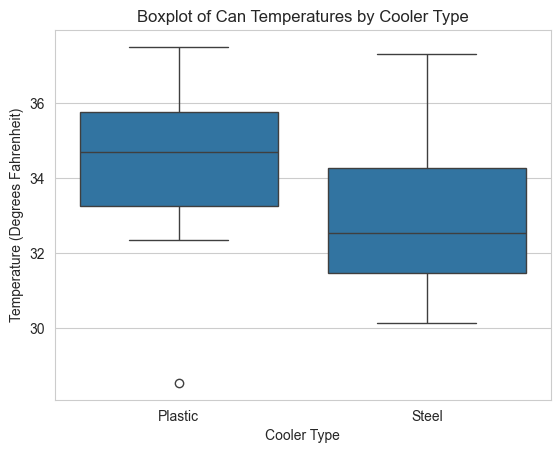

In [28]:
## Install matplotlib and seaborn ##

#%pip install matplotlib seaborn

import seaborn as sns
import matplotlib.pyplot as plt

## Set a nice minimal style for plot ##

sns.set_style("whitegrid")

## Create boxplot using seaborn ##

sns.boxplot(x="Treatment",y="Temperature",data=can_data)

## Add Title and Labels using matplotlib ##

plt.title("Boxplot of Can Temperatures by Cooler Type", loc='center')
plt.xlabel("Cooler Type")
plt.ylabel("Temperature (Degrees Fahrenheit)")

- Remember, a boxplot consists of 5 numbers. When we look at the box itself, the bottom, middle-line, and top of the box represent the 25th, 50th, and 75th percentiles, respectively.

    -   We can think of the width of the box (interquartile range, the difference between the 75th and 25th percentiles) as a measure of variability.

- The lines going out of the top and bottom of the box have a length of 1.5 times the interquartile range.

- Any points plotting above or below the upper or lower line can generally be thought of as *outliers*.

- The way I generally interpret boxplots is by looking at the degree of overlap.

    - If the boxes have substantial overlap, that means they have similar distributions and likely don't meaningfully differ.

    - If the boxes do not substantially overlap, then that means the distributions have some degree (perhaps a meaningful degree!) of difference.

- In our case, there is some overlap but not one I would consider substantial. It appears, empirically, that we have evidence of a meaningful difference in the can temperatures between the two treatment groups.

##### Inferential Analysis: The Effects Model

- After we perform our descriptive analysis, the next step is to perform the inferential analysis.

- In general, we can describe pretty much every **supervised learning technique** (that is, a model with an outcome variable and at least one explanatory/independent variable) can be described as a function.

- Remember from regression, the simple linear regression model can be written as:

$$y_{i} = \beta_0 + \beta_1x_i + \varepsilon_i $$

- When working with categorical independent variables, like we are here, we can still write our model as a regression model, but we generally use slightly different notation:

$$ y_{ij} = \mu + \tau_i + \varepsilon_{ij} $$

- This specific written model is called the **effects model**. 

    - $y_{ij}$ represents the $j$th replicate in the $i$th treatment group, 
    - $\mu$ represents the grand or overall mean of all the observations, 
    - the $\tau_i$'s are called the *effects* (the difference between the individual group means and the grand mean), and 
    - $\varepsilon_{ij}$ denotes the residual (or random error) term associated with the $j$th replicate in the $i$th treatment group.

- Akin to regression, we have distributional assumptions in the effects model. Specifically:

$$ Y_{ij} \sim N(\mu+\tau_i,\sigma^2) $$ $$ \varepsilon_{ij} \sim N(0,\sigma^2) $$

- So once we have collected real data like we have in the `can_data` dataframe, how do we go about estimating $\mu$ and the $\tau_i$'s?

- Just like we do in regression, we use least-squares estimation! The LSEs for the group means are the same calculations given for the sample means previously in these slides.

- The LSE for $\mu$, say $\hat{\mu}$, is given by:

$$ \hat{\mu} = \bar{y}_{\cdot\cdot} = \frac{1}{t}\sum_{i=1}^t\bar{y}_{i\cdot} $$

- Thus, the $\tau_{i}$ LSEs, say $\hat{\tau}_{i}$, is given by:

$$ \hat{\tau}_i = \bar{y}_{i\cdot} - \bar{y}_{\cdot\cdot} $$

- Let's see how we can estimate these values with the `car_data` using Python:

In [29]:
## Calculate the Grand Mean of Temperature ##

mu_hat = can_data['Temperature'].mean()

## Calculate the group means of Temperature, grouped by Treatment ##

group_means = can_data.groupby('Treatment')['Temperature'].mean().reset_index()
group_means = group_means.rename(columns={'Temperature': 'mean_temp'})

## Calculate the difference between group means and the grand mean ##

tau_hat = group_means['mean_temp'] - mu_hat

## Print Results ##

print("Grand Mean:", mu_hat)
print("\nGroup Means:")
print(group_means)
print("\nTau Hats:")
print(tau_hat)

Grand Mean: 33.75000000000001

Group Means:
  Treatment  mean_temp
0   Plastic  34.431333
1     Steel  33.068667

Tau Hats:
0    0.681333
1   -0.681333
Name: mean_temp, dtype: float64


- Note, in this case where we only have two treatment groups, the $\hat{\tau}_i$'s will just be the opposite sign of each other.

- Okay, now that we've put everything together, what statistical test do we run to determine if the difference we see in the group means and subsequently the $\hat{\tau}_i$'s is statistically meaningful or not?

###### Statistical Hypotheses

- First, what are our statistical hypotheses?

- In words, the null hypothesis, $H_0$, is that all the group means are equal. In mathematical notation:

$$ H_0: \mu_1 = \mu_2 = \dots = \mu_i $$

- In words, the alternative hypothesis, $H_1$, is that at least two of the group means differ. The mathematical notation is essentially the same as the words.

- In our case:

$$ H_0: \mu_{\text{Plastic}} = \mu_{\text{Steel}} $$ $$ H_1: \mu_{\text{Plastic}} \neq \mu_{\text{Steel}} $$

- Our next step would be to calculate our test statistic. For the effects model, what is our test statistic?

$$ F_{\text{Stat}} = \frac{SSTreat/(t-1)}{SSE/(n-t)} \sim F(t-1,n-t) $$ $$ SSTreat = \sum_{i=1}^{t}r_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot\cdot})^2 $$ $$ SSE = \sum_{i=1}^{t}\sum_{j=1}^{r_t}(y_{ij} - \bar{y}_{i\cdot})^2 $$

- If our $F_{\text{Stat}} > F_{cv}$, where we typically choose $F_{cv}$ such that $\alpha = 0.05$ and $F_{cv} \sim F(t-1,n-t)$, then this indicates that the data more strongly support the alternative hypothesis.

- If the converse is true, $F_{\text{Stat}} < F_{cv}$, then this indicates that the data more strongly support the null hypothesis.

- How do we calculate all of this in Python? Fortunately for us, we can do this with the `ols` function (ols being short for "ordinary least squares") which is part of the `statsmodels.api` package:

In [30]:
## Install statsmodels.api ##
#%pip install statsmodels

## Import statsmodels ##

import statsmodels.api as sm
from statsmodels.formula.api import ols

## Fit One-Way ANOVA Model ##

mod = ols("Temperature ~ Treatment", data=can_data).fit()

## Get the ANOVA table ##

aov_tab = sm.stats.anova_lm(mod,typ=1)

print(aov_tab)

             df      sum_sq    mean_sq         F    PR(>F)
Treatment   1.0   27.852907  27.852907  7.626809  0.007689
Residual   58.0  211.814493   3.651974       NaN       NaN


- As we can see, the F-statistic is 7.63 and its associated p-value is 0.008.

- Since p (which is the probability of observing a test statistic of greater magnitude in a world where we assume $H_0$ is true) is less than our typically used $\alpha$ threshold of 0.05, this indicates to us that our data more strongly support the alternative hypothesis.

- In more contextual language, our data support the notion that the stainless steel cooler keeps canned beverages meaningfully colder than the hard plastic cooler.

##### Inferential Analysis: Two Group Case

- Now, in the case when we have only two treatment groups, like we do here, this F-test can be somewhat simplified into an independent means $t$-test.

- The statistical hypotheses stay the same but the test statistic can be rewritten as:

$$ t_{\text{Stat}} = \frac{\bar{y}_1 - \bar{y}_2}{\sqrt{s^2_{\text{Pooled}}\bigg(\frac{1}{r_1} + \frac{1}{r_2}\bigg)}} \sim t(r_1 + r_2 - 2)$$

- where:

$$ s^2_{\text{Pooled}} = \frac{(r_1 - 1)s_1^2 + (r_2 - 1)s_2^2}{r_1 + r_2 - 2} $$

- If $|t_{\text{Stat}}| > t_{cv}$, then we conclude that our data more strongly support the alternative hypothesis.

- Note, $t_{\text{Stat}}^2 = F_{\text{Stat}}$. So technically an independent means t-test can be performed as a one-way ANOVA with two groups.

## Your Turn!

- Let's say we work for a dog toy manufacturing company. We want to manufacture rubber tennis balls for dogs to be able to play with and chew on that are designed to last. As you may know, some dogs who are of certain breeds and/or are aggressive chewers can break toys very easily. We want to avoid that as much as possible with our rubber tennis balls. Our engineers have come up with two different formulations of hard rubber that can be used to manufacture these balls. Let's denote these as Formula 1 and Formula 2.

- To decide which formulation to use, we want to perform a pressure test to simulate the pressure these rubber tennis balls might experience being clamped down on by a dog's jaw. We test 60 balls of each formulation by putting them each under a hydraulic press and recording the amount of pressure exerted (in PSI) when the ball rips.

- The data for this experiment are contained in the "Dog Toys.xlsx" file.

- With these data, I want you to create a .ipynb file where you answer the following questions (check the answer key in the Dog Toys Example notebook!):

    1. Specify the outcome and independent variables. What lurking variables might be present?
    2. Briefly explain why a completely randomized design might be appropriate in this context
    3. Perform an appropriate exploratory analysis
    4. Perform an appropriate inferential analysis (including the specification of $H_0$ and $H_1$)
    5. Provide contextual conclusions -- which formulation seems more durable?
    6. What questions remain?